In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier   
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
## statistical analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
## data verification,data type,numbers of features and rows,missing data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#converting Totalcharges from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df.shape

(7043, 21)

In [8]:
#checking out the missing values

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

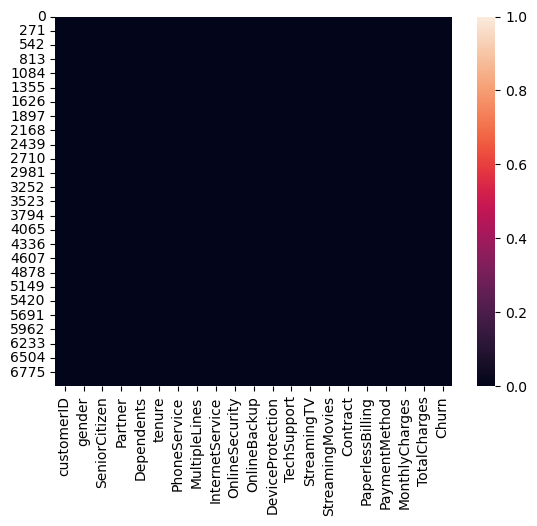

In [9]:
#Visualize relationships between the label and some key features
#Visualizing the missing data and Exploring correlations
sns.heatmap(df.isna())

In [43]:
#fillin the missing data with median

Median = df['TotalCharges'].median()
Median

1397.475

In [10]:
df['TotalCharges'].fillna(value = 1397.475, inplace = True)

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#filter out categorical and numerical columns

numerical_cols = df.select_dtypes(include=['number'])

In [13]:
numerical_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [14]:
numerical_cols.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [15]:
categorical_cols = df.select_dtypes(include=['object'])

In [16]:
categorical_cols

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
for col in categorical_cols.columns:
  print(col)
  print(categorical_cols[col].nunique())

customerID
7043
gender
2
Partner
2
Dependents
2
PhoneService
2
MultipleLines
3
InternetService
3
OnlineSecurity
3
OnlineBackup
3
DeviceProtection
3
TechSupport
3
StreamingTV
3
StreamingMovies
3
Contract
3
PaperlessBilling
2
PaymentMethod
4
Churn
2


In [18]:
for col in categorical_cols.columns:
  print(col)
  print(categorical_cols[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


# Categorical EDA: Univariate and Bivariate

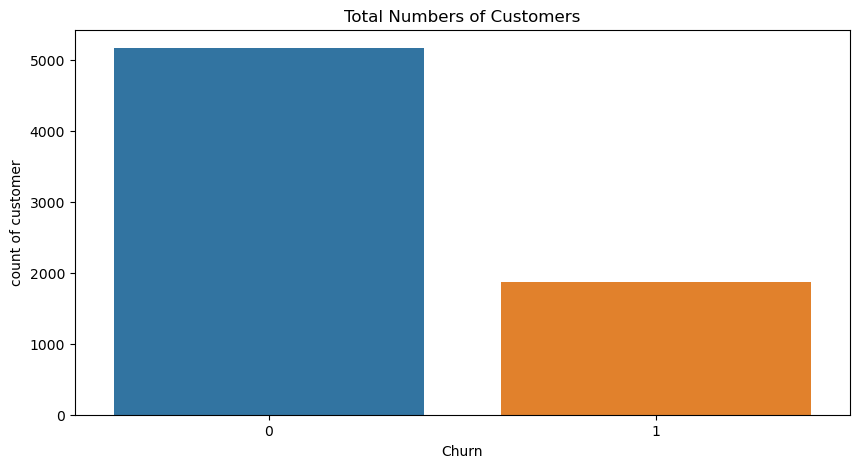

In [62]:
#Conduct univariate, bivariate, and multivariate analysis as much as is feasible

plt.figure(figsize = (10,5))
sns.countplot(x = 'Churn', data=df)
plt.xlabel('Churn')
plt.ylabel('count of customer')
plt. title('Total Numbers of Customers');

In [20]:
df['PaymentMethod'].value_counts().index

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object', name='PaymentMethod')

Text(0.5, 1.0, 'Customers Churn')

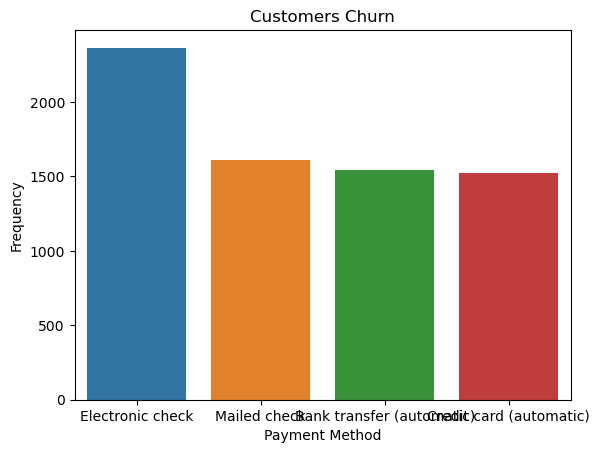

In [21]:
sns.countplot(data = df, x = 'PaymentMethod', order = df['PaymentMethod'].value_counts().index )
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Customers Churn')

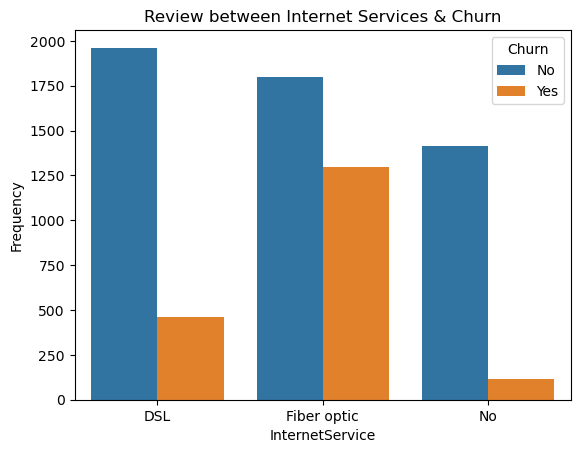

In [22]:
#Bivariate

sns.countplot(data = df, x = 'InternetService', hue = 'Churn')
plt.xlabel("InternetService")
plt.ylabel("Frequency")
plt.title("Review between Internet Services & Churn")
plt.legend(title = 'Churn')


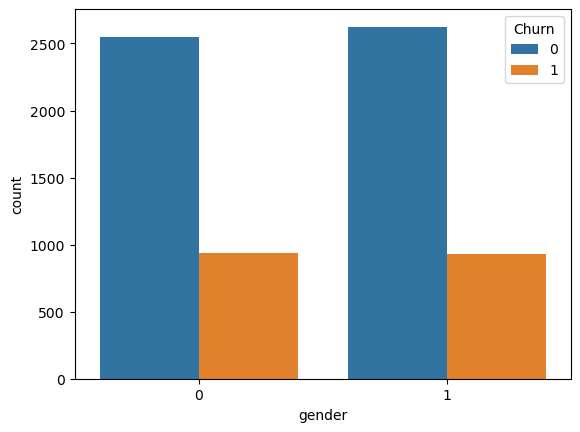

In [79]:
sns.countplot(data = df, x = 'gender', hue = 'Churn');

In [24]:
def perform_categorical_eda(col, hue_y = "SeniorCitizen", data = df):
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
  #countplot
  sns.countplot(x=col, hue=hue_y, data=df, ax=axs[0])
  axs[0].set_title(f'Count Plot of {col} with {hue_y} as Hue')
  # Point plot
  sns.pointplot(x=col, y=hue_y, data=df, ax=axs[1])
  axs[1].set_title(f'Point Plot of {col} with {hue_y} as Y')
  plt.tight_layout()
  plt.show()

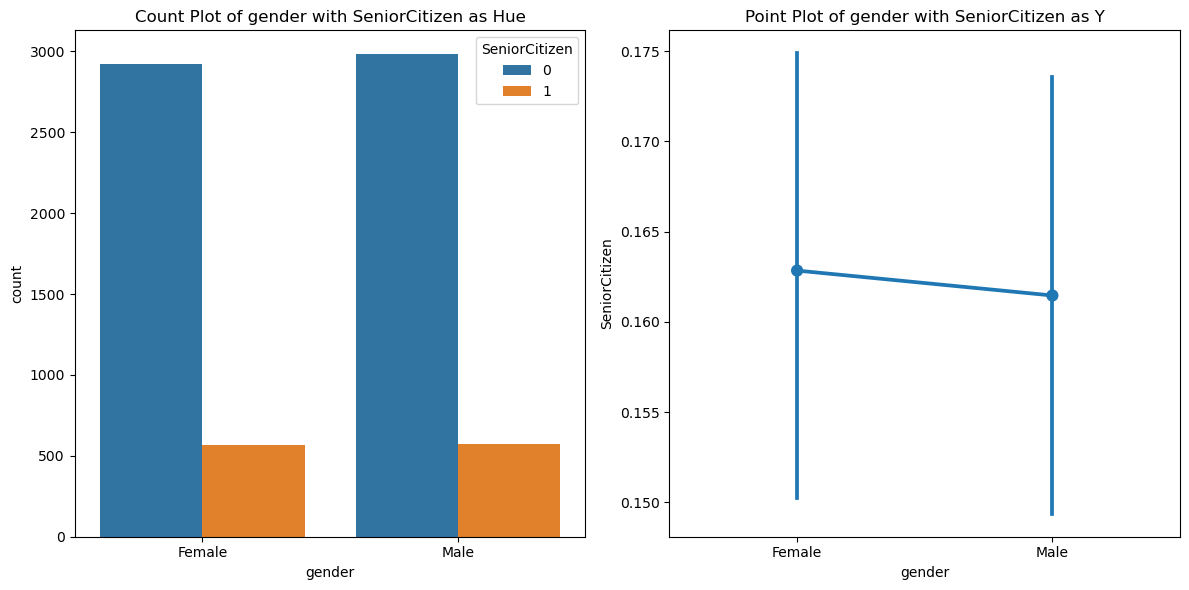

In [25]:
 perform_categorical_eda('gender')

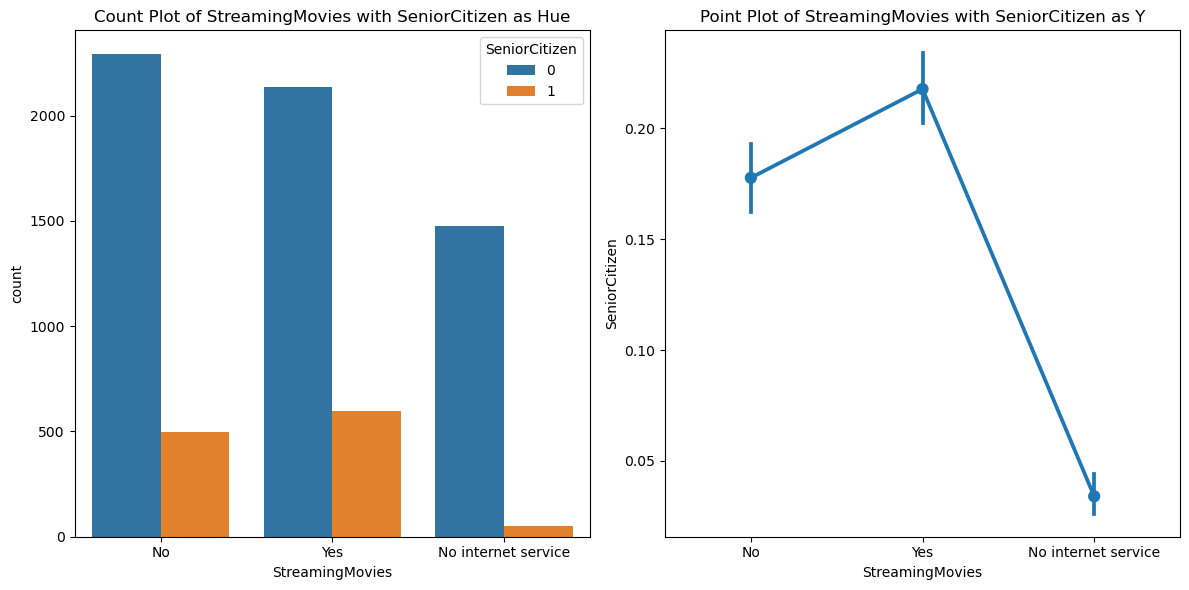

In [26]:
perform_categorical_eda('StreamingMovies')

In [27]:
#Bivariate analysis using some selected features

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
feature_list = ['gender','InternetService','TechSupport','StreamingTV','StreamingMovies','PaymentMethod' ]

In [29]:
df[feature_list]

,gender,InternetService,TechSupport,StreamingTV,StreamingMovies,PaymentMethod
0,Female,DSL,No,No,No,Electronic check
1,Male,DSL,No,No,No,Mailed check
2,Male,DSL,No,No,No,Mailed check
3,Male,DSL,Yes,No,No,Bank transfer (automatic)
4,Female,Fiber optic,No,No,No,Electronic check
...,...,...,...,...,...,...
7038,Male,DSL,Yes,Yes,Yes,Mailed check
7039,Female,Fiber optic,No,Yes,Yes,Credit card (automatic)
7040,Female,DSL,No,No,No,Electronic check
7041,Male,Fiber optic,No,No,No,Mailed check


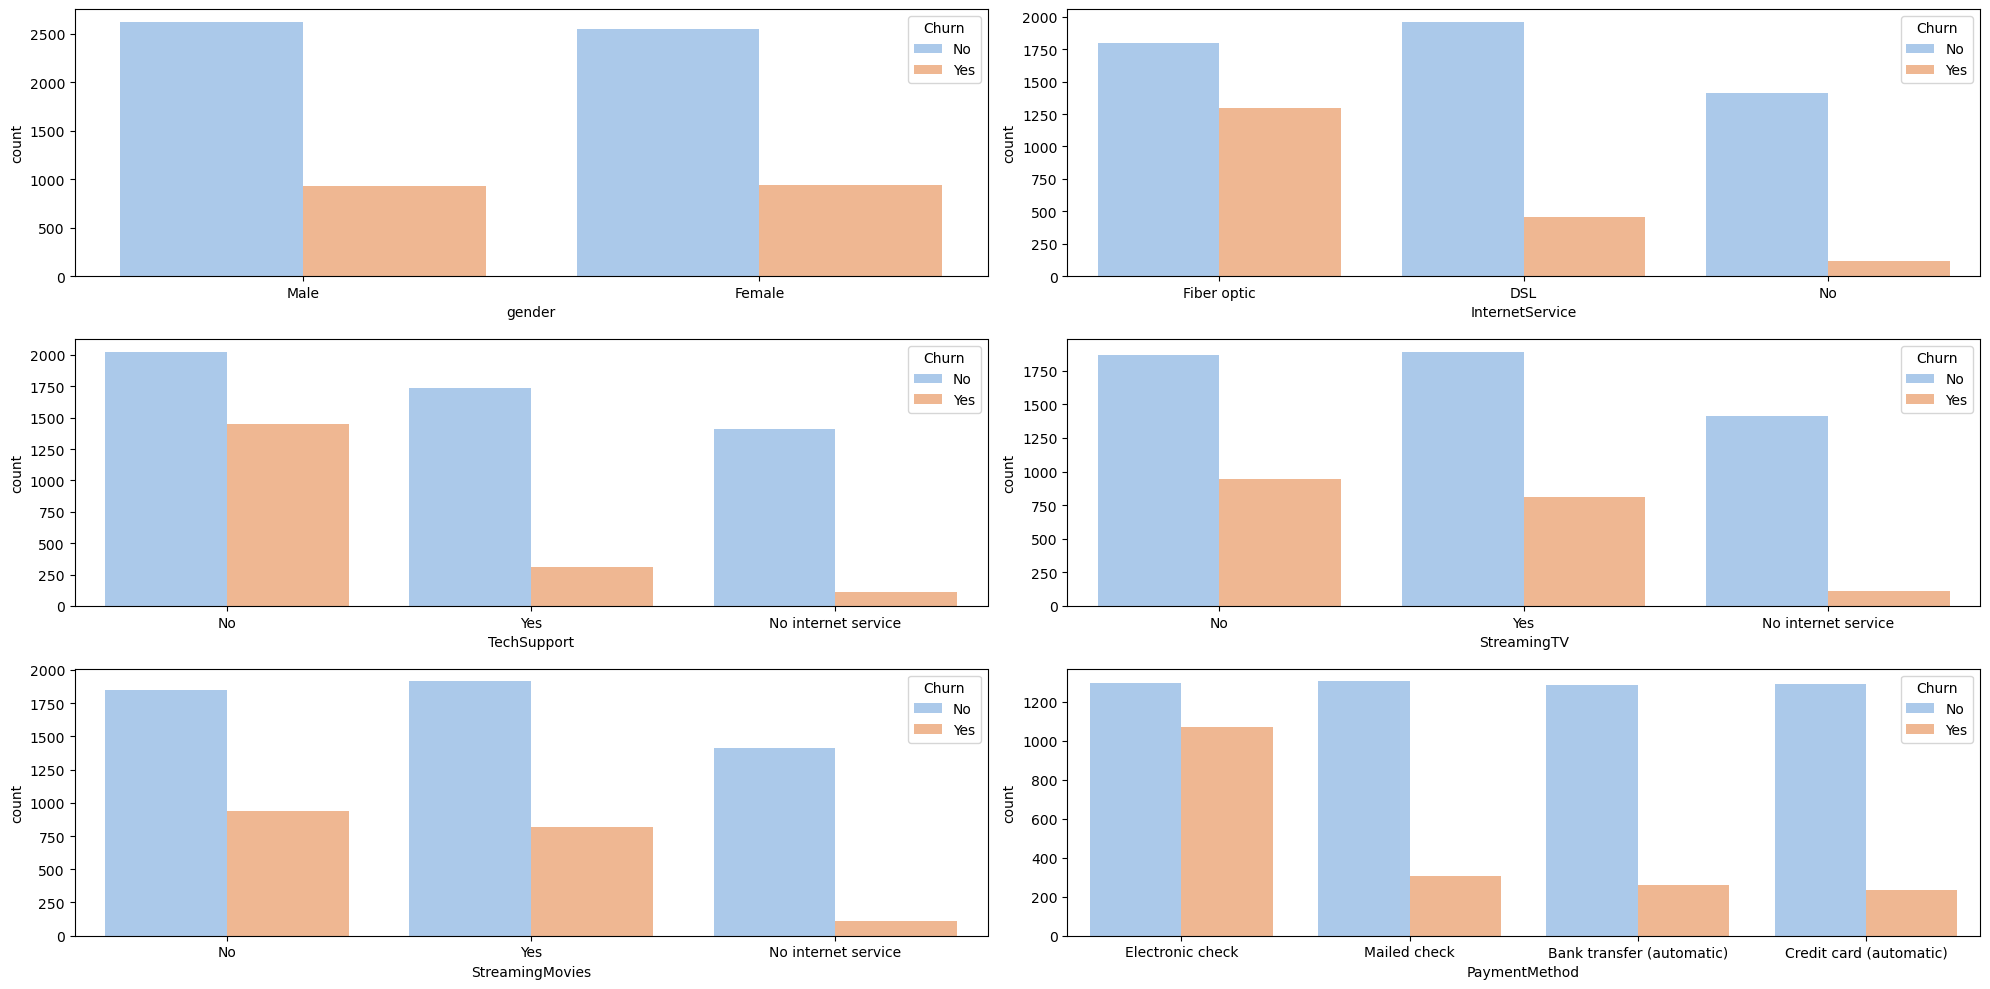

In [30]:
num_cols = 2
num_rows = 3

fig, axes = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (20,10))
axes = axes.flatten()

for index, feature in enumerate(feature_list):
    ax = axes[index]
    sns.countplot(data=df, x = feature, ax = ax, order = df[feature].value_counts().index, palette = 'pastel', hue = 'Churn' )
    
plt.tight_layout()

# Multivariate

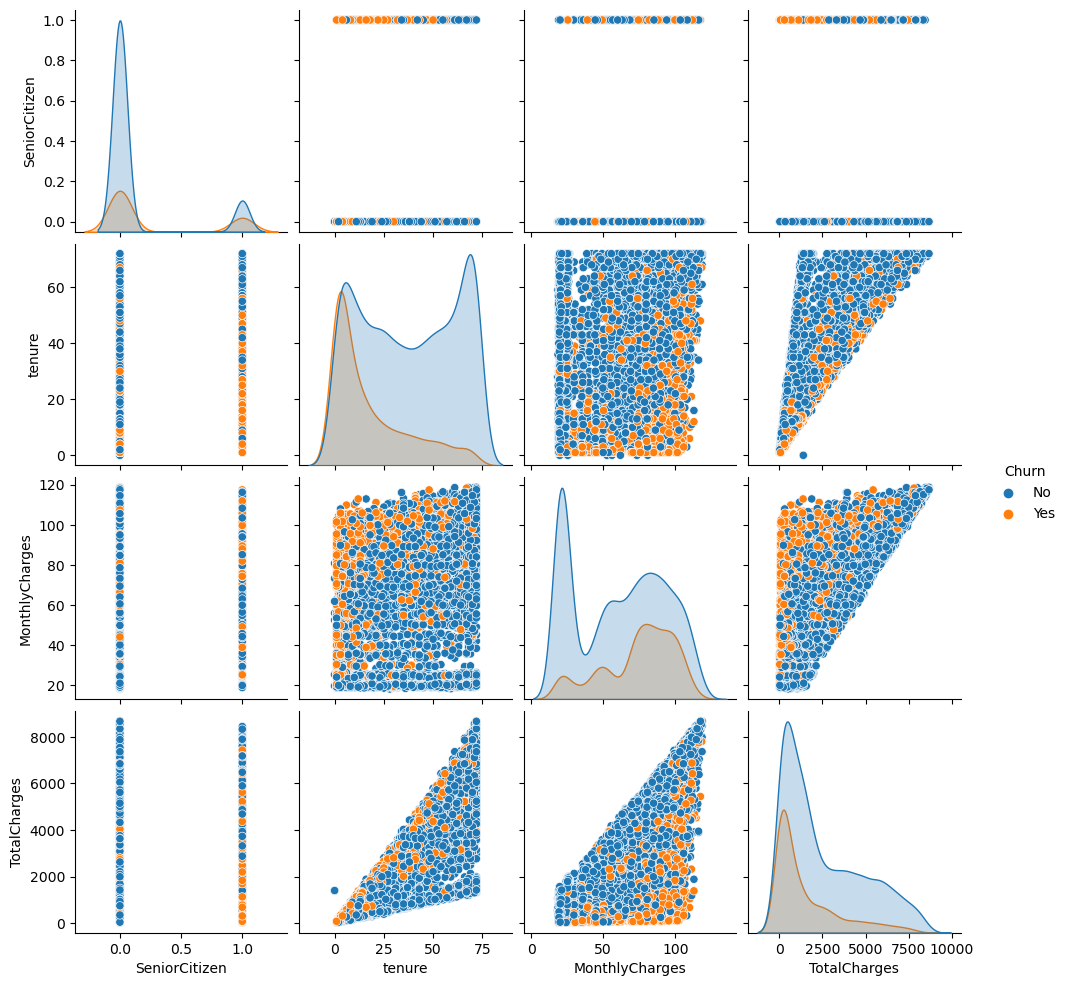

In [31]:
sns.pairplot(df, hue = 'Churn');

# Numerical EDA: Uivariate and Bivariate


In [32]:
numerical_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


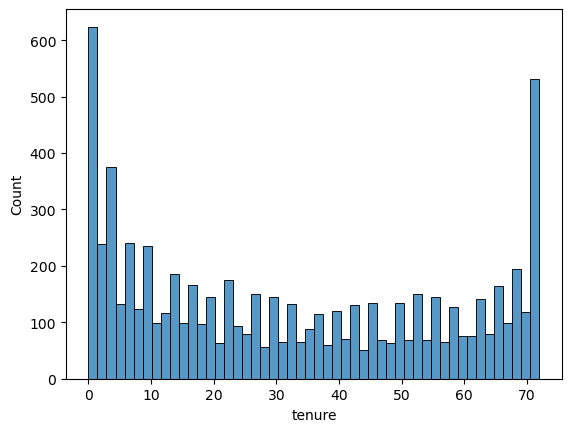

In [33]:
sns.histplot(df['tenure'], bins = 50);

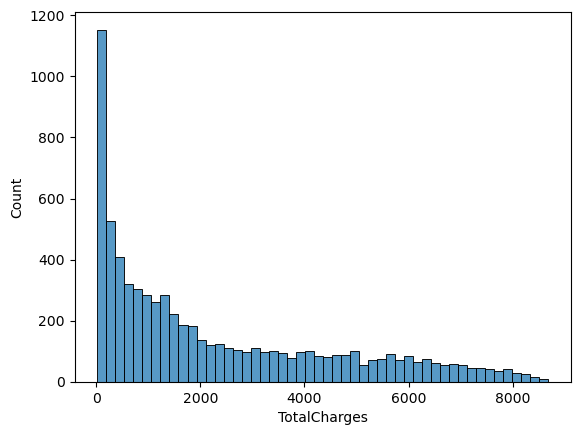

In [34]:
sns.histplot(df['TotalCharges'], bins = 50);

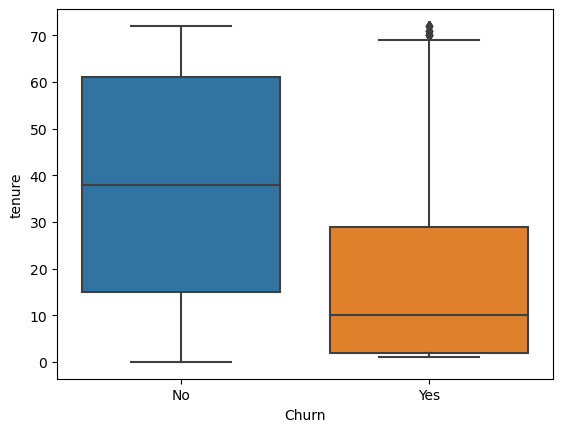

In [35]:
sns.boxplot(x = 'Churn', y = 'tenure', data = df);

In [36]:
##MULTIVARIATE NUMERICAL

In [37]:
correlation_matrix = numerical_cols.corr()

In [38]:
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


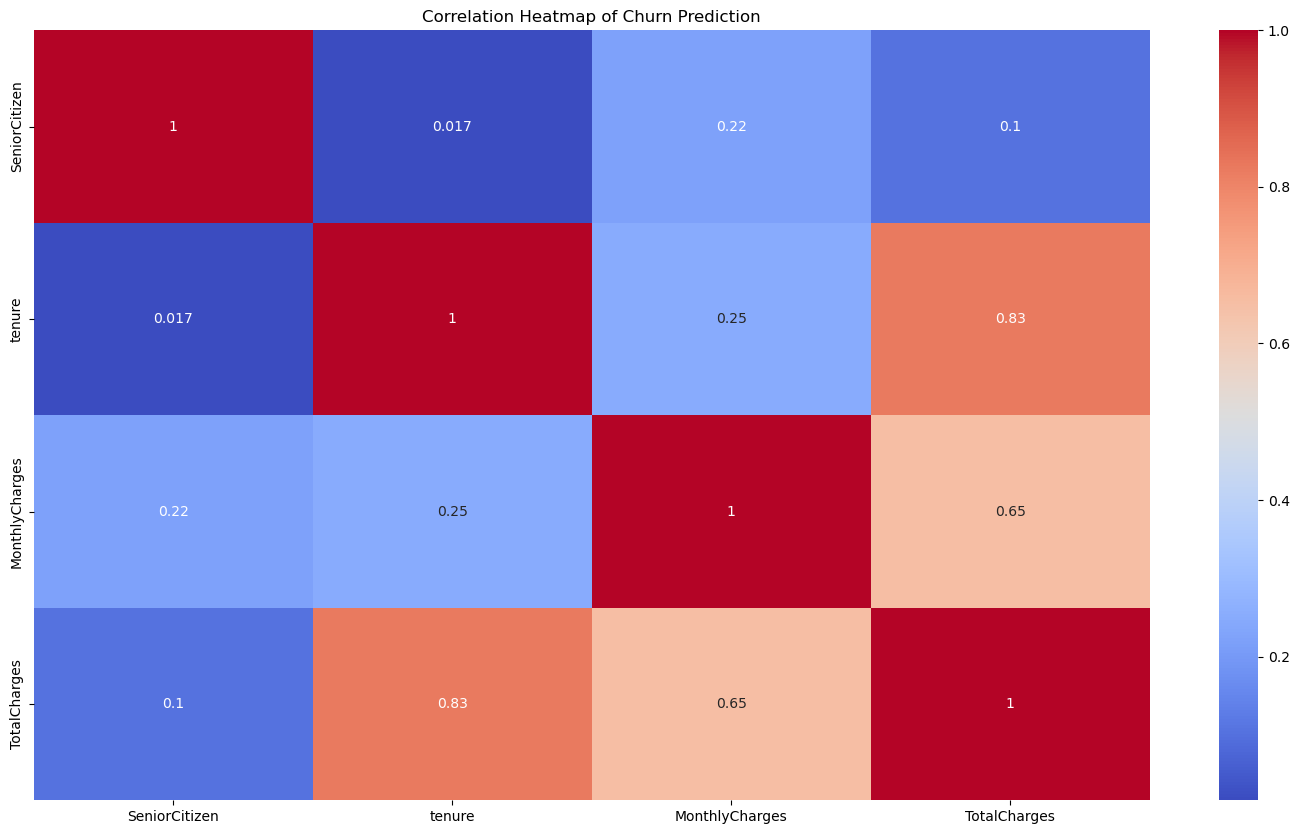

In [39]:
#Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Churn Prediction')
plt.show()

In [40]:
#Encoding categorical variables
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
numerical_cols.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [42]:
categorical_cols.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [44]:
#creating new features from existing features 

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in categorical_cols.columns:
    df[col] = label.fit_transform(df[col])


In [45]:
df.corr()['Churn']

customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199037
Churn               1.000000
Name: Churn, dtype: float64

In [46]:
#drop customerId

df1 = df.drop(['customerID'], axis = 1)

In [47]:
#scaling
X = df.drop(['Churn'], axis = 1)

y = df['Churn']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
X.mean()

-1.513295617833523e-18

In [49]:
X.std()

0.9999999999999999

In [50]:
#Train and test at least 3 supervised learning model
#Split the dataset into training and testing set-- X = Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)


In [73]:
#Create and fit model

linear_model = LogisticRegression()

linear_model.fit(X_train, y_train)

#prediction

y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

#Actual Train and Test Scores
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

prec_train = precision_score(y_train, y_pred_train)
prec_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print('Train Accuracy:',acc_train,'Test Accuracy:',acc_test)
print('Train Accuracy:',prec_train,'Test Accuracy:',prec_test)
print('Train Accuracy:',f1_train,'Test Accuracy:',f1_test)

Train Accuracy: 0.8048087845513063 Test Accuracy: 0.8018171493469619
Train Accuracy: 0.6567944250871081 Test Accuracy: 0.6608478802992519
Train Accuracy: 0.5939346199291059 Test Accuracy: 0.6029579067121729


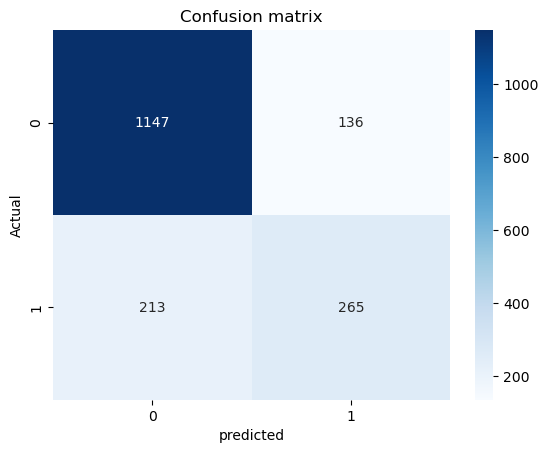

In [74]:
#confusion metrics

lr = confusion_matrix(y_test, y_pred_test)
sns.heatmap(lr, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [ ]:
# This model tells us that the Accuracy Score suggested a good performance because its close to the train accuracy 
# and also the confusion matrix indicates true negative(TN) is on the high side which means a lot of customers did not churn the company
# while the TP shows that few numbers of people actually churned the company but can still be on for retention.

In [75]:
#Create and fit model

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

#prediction

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

#Actual Train and Test Scores
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

prec_train = precision_score(y_train, y_pred_train)
prec_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print('Train Accuracy:',acc_train,'Test Accuracy:',acc_test)
print('Train Accuracy:',prec_train,'Test Accuracy:',prec_test)
print('Train Accuracy:',f1_train,'Test Accuracy:',f1_test)

Train Accuracy: 1.0 Test Accuracy: 0.7927314026121521
Train Accuracy: 1.0 Test Accuracy: 0.6547945205479452
Train Accuracy: 1.0 Test Accuracy: 0.5670225385527877


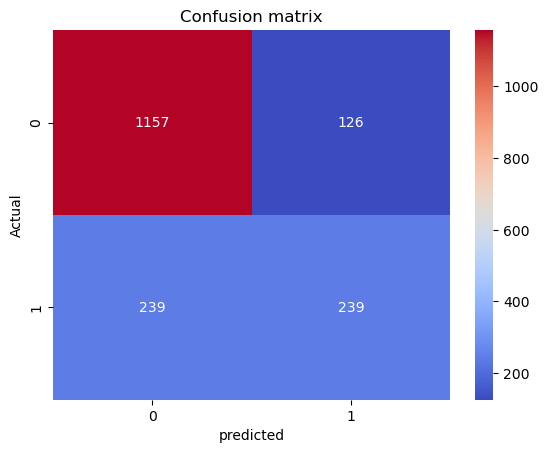

In [76]:
#confusion metrics

rf = confusion_matrix(y_test, y_pred_test)
sns.heatmap(rf, annot=True, cmap="coolwarm", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [77]:
#Create and fit model

kn_model = KNeighborsClassifier()

kn_model.fit(X_train, y_train)

#prediction

y_pred_train = kn_model.predict(X_train)
y_pred_test = kn_model.predict(X_test)

#Actual Train and Test Scores
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

prec_train = precision_score(y_train, y_pred_train)
prec_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print('Train Accuracy:',acc_train,'Test Accuracy:',acc_test)
print('Train Accuracy:',prec_train,'Test Accuracy:',prec_test)
print('Train Accuracy:',f1_train,'Test Accuracy:',f1_test)

Train Accuracy: 0.8360469519121545 Test Accuracy: 0.7558205565019875
Train Accuracy: 0.7101681345076061 Test Accuracy: 0.5542986425339367
Train Accuracy: 0.6719696969696969 Test Accuracy: 0.5326086956521738


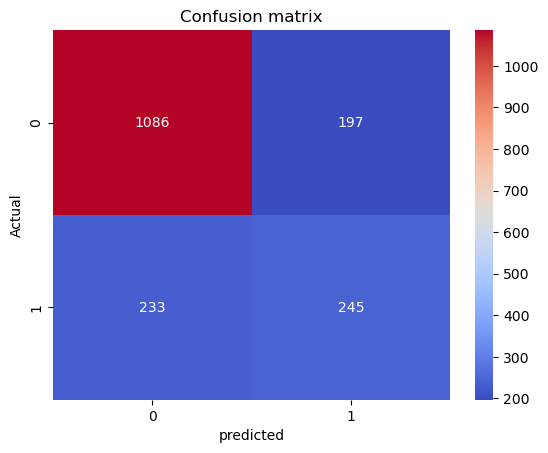

In [78]:
kn = confusion_matrix(y_test, y_pred_test)
sns.heatmap(kn, annot=True, cmap="coolwarm", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [ ]:
#FN is very close to TP, the prediction is good but the incorrectly predicted churn is very close the actual prediction 

In [64]:
##Evaluation Metrics:Accuracy Score and F1 Score

def eval_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    train_score = f1_score(y_train,y_pred_train)
    test_score = f1_score(y_test,y_pred_test)
    return acc_train, acc_test,train_score, test_score

In [65]:
# Creating the models

models = [LogisticRegression(), RandomForestClassifier(), GaussianNB()]
for model in models:
  acc_train, acc_test, train_score, test_score = eval_model(model)
  print(model)
  print(acc_train, acc_test, train_score, test_score)
  print('---------------')

LogisticRegression()
0.8048087845513063 0.8018171493469619 0.5939346199291059 0.6029579067121729
---------------
RandomForestClassifier()
1.0 0.8012492901760363 1.0 0.5783132530120482
---------------
GaussianNB()
0.7519878833775085 0.7649063032367973 0.608955223880597 0.6303571428571428
---------------


In [67]:
#Model Selection And Improvement

model = models[1]

feature_importances = model.feature_importances_

columns = df.drop("Churn", axis =1).columns

In [69]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)


             Feature  Importance
19      TotalCharges    0.159338
18    MonthlyCharges    0.147331
5             tenure    0.132530
0         customerID    0.128483
15          Contract    0.077397
12       TechSupport    0.042811
9     OnlineSecurity    0.042124
17     PaymentMethod    0.041968
8    InternetService    0.026047
1             gender    0.024157
10      OnlineBackup    0.023441
16  PaperlessBilling    0.022928
11  DeviceProtection    0.021811
7      MultipleLines    0.019985
3            Partner    0.019197
2      SeniorCitizen    0.018460
13       StreamingTV    0.016699
4         Dependents    0.016492
14   StreamingMovies    0.014364
6       PhoneService    0.004436


In [ ]:
# TotalCharges is more important to the problem because it has the most importance rate 
# and needs to be checked on to reduce the churn and to sustain customers in the company.

# The company should be more  concerned about a better result on false negative 
# because its very close and sometimes equal to the True Positive like in the Random forest prediction, 
# churn needs to be correctly identified in the dataset           